<a href="https://colab.research.google.com/github/Ricardo711/Python/blob/main/black_sholes_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
!pip install requests-cache

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
#Black Sholes fair price for a call option
class BS():
    def __init__(self, S, K, T, r, sigma):
        self.price  = S
        self.strk_price = K
        self.strk_time = T/365
        self.interest = r
        self.volat = sigma

    def d1(self):
      return (np.log(self.price/self.strk_price)+(self.interest+0.5*self.volat **2)*self.strk_time)/(self.volat*np.sqrt(self.strk_time))

    def d2(self):
      return self.d1() - self.volat * np.sqrt(self.strk_time)

    def bs_call(self):
        d1 = self.d1()
        d2 = self.d2()
        return self.price*norm.cdf(d1) - self.strk_price*np.exp(-self.interest*self.strk_time)*norm.cdf(d2)


In [ ]:
import requests_cache
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import pandas_datareader.data as wb

class Ticker: #Taken from https://github.com/krivi95/option-pricing-models/blob/master/option_pricing/ticker.py
    @staticmethod
    def get_historical_data(ticker, start_date=None, end_date=None, cache_data=True, cache_days=1):
        """
        Fetches stock data from yahoo finance. Request is by default cashed in sqlite db for 1 day.
        Params:
        ticker: ticker symbol
        start_date: start date for getting historical data
        end_date: end date for getting historical data
        cache_date: flag for caching fetched data into slqite db
        cache_days: number of days data will stay in cache
        """
        try:
            # initializing sqlite for caching yahoo finance requests
            expire_after = timedelta(days=1)
            session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)

            # Adding headers to session
            session.headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0', 'Accept': 'application/json;charset=utf-8'}  # noqa

            if start_date is not None and end_date is not None:
                data = wb.DataReader(ticker, data_source='yahoo', start=start_date, end=end_date, session=session)
            else:
                data = wb.DataReader(ticker, data_source='yahoo', session=session)   #['Adj Close']
            if data is None:
                return None
            return data
        except Exception as e:
            print(e)
            return None

    @staticmethod
    def get_columns(data):
        if data is None:
            return None
        return [column for column in data.columns]

    @staticmethod
    def get_last_price(data, column_name):
        if data is None or column_name is None:
            return None
        if column_name not in Ticker.get_columns(data):
            return None
        return data[column_name].iloc[len(data) - 1]


    @staticmethod
    def plot_data(data, ticker, column_name):
        try:
            if data is None:
                return
            data[column_name].plot()
            plt.ylabel('{}'.format(column_name))
            plt.xlabel('Date')
            plt.title('Historical data for {} - {}'.format(ticker, column_name))
            plt.legend(loc='best')
            plt.show()
        except Exception as e:
            print(e)
            return

In [ ]:
# Fetching the prices from yahoo finance
tickers = ['TSLA', 'AAPL', 'MSFT', 'GOOGL']
for tk in tickers:
    data = Ticker.get_historical_data(tk)
    print(Ticker.get_columns(data))
    print(Ticker.get_last_price(data, 'Adj Close'))
    Ticker.plot_data(data, tk, 'Adj Close')

string indices must be integers
None
None
string indices must be integers
None
None
string indices must be integers
None
None
string indices must be integers
None
None


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

def options_chain(symbol):
    tk = yf.Ticker(symbol)
    exps = tk.options # Expiration dates

    # Get options for each expiration
    options = pd.DataFrame()
    for e in exps:
        opt = tk.option_chain(e)
        opt = pd.DataFrame().append(opt.calls)
        opt['expirationDate'] = e
        options = options.append(opt, ignore_index=True)

    # Bizarre error in yfinance that gives the wrong expiration date. Add 1 day to get the correct expiration date
    options['expirationDate'] = pd.to_datetime(options['expirationDate']) + timedelta(days = 1)
    options['days2exp'] = (options['expirationDate'] - datetime.today()).dt.days

    options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options['mark'] = (options['bid'] + options['ask']) / 2 # Calculate the midpoint of the bid-ask

    # Drop unnecessary and meaningless columns
    options = options.drop(columns = ['contractSize', 'currency', 'change', 'percentChange', 'lastTradeDate', 'lastPrice'])

    return options

option_list = {}
list_companies =  ['TSLA', 'AAPL', 'MSFT', 'GOOGL']
for cpny in list_companies:
    option = options_chain(cpny)
    option_list[cpny] = option


Datos filtrados por fecha

In [ ]:
list_companies =  ['TSLA', 'AAPL', 'MSFT', 'GOOGL']
dt = datetime(2022, 11, 30)
option_filtered = {}
for cpny in list_companies:
    print(cpny)
    option_filtered[cpny] = option_list[cpny][option_list[cpny].expirationDate < dt]
    display(option_filtered[cpny].expirationDate)

option_filtered = option_filtered

Ploteo de Datos

In [ ]:
def plot_data(data, ticker, column_name):
    data[column_name].plot()
    plt.ylabel('{}'.format(column_name))
    plt.xlabel('Date')
    plt.title('Options data for {} - {}'.format(ticker, column_name))
    plt.legend(loc='best')
    plt.show()

def plot_data_dif(data, col1, col2):
    (data[col1] - data[col2]).plot()
    plt.ylabel('dif {} - {}'.format(col1, col2))
    plt.xlabel('Date')
    plt.legend(loc='best')
    plt.show()

list_companies =  ['TSLA', 'AAPL', 'MSFT', 'GOOGL']
#for  cnp in list_companies:
#     plot_data(option_list[cnp], cnp, 'ask')
#     plot_data(option_list[cnp], cnp, 'strike')

#for  cnp in list_companies:
#     plot_data_dif(option_list[cnp], 'ask', 'strike')

Para cada compañia ['TSLA', 'AAPL', 'MSFT', 'GOOGL'] se predicen los precios de las opciones para cada tiempo de expiracion y se comparan contro los valores del ask para ver cuanto se acercan uno al otro debe y ver cuan buena es la prediccion de BS

In [ ]:
def compute_volatility(df):
    df = df.assign(close_day_before = df.Close.shift(1))
    df['returns'] = (df.Close - df.close_day_before)/df.close_day_before
    sigma = np.sqrt(252) * df['returns'].std()
    return sigma, df

#calculo de la volatilidad
today = datetime.now()
one_year_ago = today.replace(year=today.year-1)
interest = Ticker.get_historical_data("^TNX",start_date=today.replace(day=today.day-1), end_date=today)
interest = interest['Close'].iloc[-1]/100
errors = {}
bs = {}
mse = {}

for stock in list_companies:
    df_stock = Ticker.get_historical_data(stock)
    df_stock = df_stock.sort_values(by="Date")
    df_stock = df_stock.dropna()
    sigma, df_stock = compute_volatility(df_stock)
    stock_price = df_stock['Close'].iloc[-1]
    days2exp = option_list[stock].days2exp
    strike_price = option_list[stock].strike
    bs_obj = BS(stock_price, strike_price, days2exp, interest, sigma)
    call_price = bs_obj.bs_call()
    bs[stock] = call_price
    errors[stock] = np.abs(np.array(option_list[stock]['ask']) - bs[stock])
    mse[stock] = np.sqrt(np.mean(errors[stock]**2) / bs[stock].shape[0])
    print('The Option Price of option {} is {} '.format(stock, mse[stock]))

The Option Price of option TSLA is 0.9783138143039061 
The Option Price of option AAPL is 0.05625324919899012 
The Option Price of option MSFT is 0.14705949350024466 
The Option Price of option GOOGL is 6.061570450757901 


Some *statistics*, también se eliminan los outliers

max y min 9.34070818784389 -5.536317247603193
max y min 3.037558097966205 -1.7315561288402803
max y min 4.881013143429926 -2.7668005204982853
max y min 5.561215255521353 -3.3367291533128105


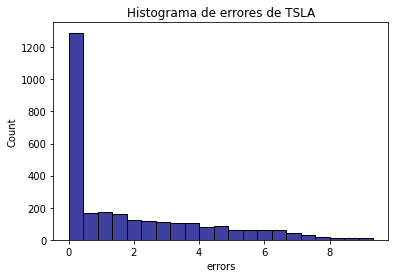

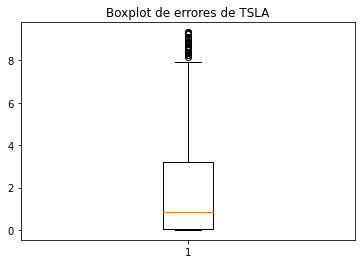

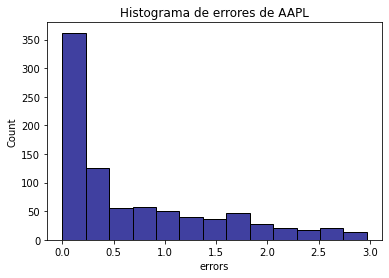

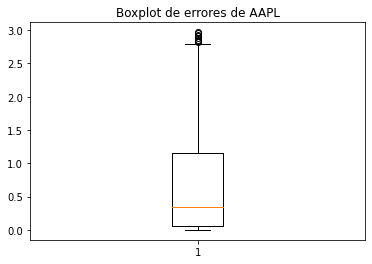

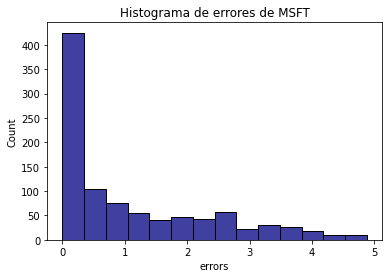

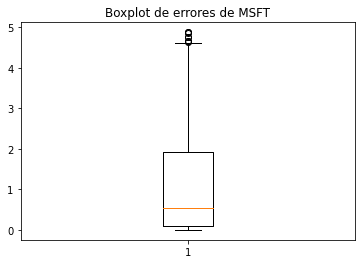

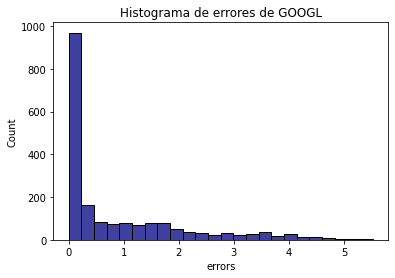

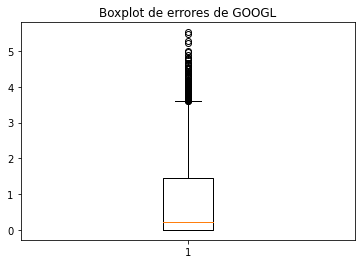

,stock,min,max,mean,median
0,TSLA,0.0,9.329729,1.841153,0.840072
1,AAPL,0.0,2.969409,0.698241,0.336864
2,MSFT,0.0,4.876382,1.095471,0.539748
3,GOOGL,0.0,5.523478,0.859074,0.231000


In [ ]:
import seaborn as sns

wout_outliers = {}
for stock in list_companies:
    a = np.array(errors[stock])
    b = a[~np.isnan(a)]
    Q1 = np.percentile(b , 25)
    Q3 = np.percentile(b , 75)
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    wout_outliers[stock] = b[(b < ul) & (b > ll)]
    print('max y min', ul, ll)

statistics = {}
for stock in list_companies:
    statistics[stock] = [np.min(wout_outliers[stock]), np.max(wout_outliers[stock]),
                         np.mean(wout_outliers[stock]), np.median(wout_outliers[stock])]
    sns.histplot(data=wout_outliers[stock], color = 'navy')
    plt.xlabel('errors')
    plt.title('Histograma de errores de {}'.format(stock))
    plt.show()
    plt.boxplot(wout_outliers[stock])
    plt.title('Boxplot de errores de {}'.format(stock))
    plt.show()

lis_name = ['min', 'max', 'mean', 'median']
stat = pd.DataFrame()
stat['stock']=['TSLA', 'AAPL', 'MSFT', 'GOOGL']
for j, n in enumerate(lis_name):
    lista = []
    for stock in list_companies:
        lista.append(statistics[stock][j])
    stat[n] = lista
display(stat)